                                                    Step 1: Import Libraries and Load Data


                                                            

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\hp\Desktop\Unified Mentor\Daily Household Transactions\Daily Household Transactions.csv")

In [3]:
data.head(10)

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR
5,15/09/2018 06:34:17,Credit Card,subscription,Tata Sky,Permanent Residence - Tata Play recharge,200.0,Expense,INR
6,14/09/2018 05:39:17,Cash,Transportation,auto,Place 2 station to Permanent Residence,50.0,Expense,INR
7,13/09/2018 21:35:15,Saving Bank account 1,Transportation,Train,2 Place 0 to Place 3,40.0,Expense,INR
8,13/09/2018 21:01:47,Credit Card,Other,NaN,HBR 2 Months subscription,83.0,Expense,INR
9,13/09/2018 21:01:32,Cash,Food,Grocery,1kg atta,46.0,Expense,INR


In [10]:
data.shape[0] #Number of Rows

2461

In [11]:
data.shape[1] #Number of Columns

8

In [12]:
data.describe()

,Amount
count,2461.000000
mean,2751.145380
std,12519.615804
min,2.000000
25%,35.000000
50%,100.000000
75%,799.000000
max,250000.000000


In [13]:
data.describe(include=['object'])

,Date,Mode,Category,Subcategory,Note,Income/Expense,Currency
count,2461,2461,2461,1826,1940,2461,2461
unique,1611,12,50,90,1057,3,1
top,1/5/2017,Saving Bank account 1,Food,Milk,milk 1lit,Expense,INR
freq,11,1223,907,162,67,2176,2461



                                                          
                                                          Step 2: Data Cleaning         

                                                          

In [6]:
data.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [26]:
for column in data.columns[data.isnull().any()]:
    print(f"Column: '[{column}]' has {data[column].isnull().sum()} missing values")

Column: '[Subcategory]' has 635 missing values
Column: '[Note]' has 521 missing values


In [27]:
#Fill missing values with mode
data.fillna(data.mode().iloc[0], inplace=True)

In [28]:
#verify if the missing values have been handled
data.isnull().sum().sum()

np.int64(0)

In [29]:
#Convert Date to datetime type
data['Date'] = pd.to_datetime(data['Date'],format='mixed', dayfirst=True)

In [30]:
#identify duplicate rows
data.duplicated().sum()

np.int64(9)

In [31]:
#Remove duplicate Rows
data = data.drop_duplicates()

In [32]:
#Check if duplicate rows are removed
data.duplicated().sum()

np.int64(0)

In [33]:
data.dtypes

Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
Year-Month             period[M]
dtype: object



                                                        Exploratory Data Analysis (EDA)
                                                              Summary statistics.

                                                              

In [34]:
# Summary statistics for Amount column
summary_stats = data["Amount"].describe()
print("Summary Statistics:\n", summary_stats)

Summary Statistics:
 count      2452.000000
mean       2757.976664
std       12542.057491
min           2.000000
25%          35.000000
50%         100.000000
75%         784.500000
max      250000.000000
Name: Amount, dtype: float64



                                                        
                                                        Distribution of transaction amounts

                                                        

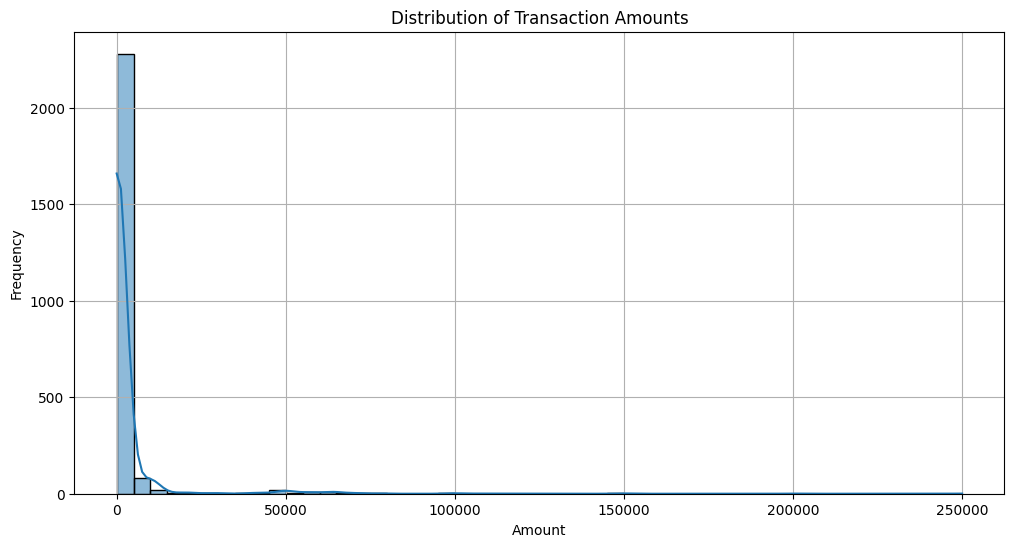

In [6]:
# Plot distribution of transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(data["Amount"], bins=50, kde=True)
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



                                                        
                                                        Transaction counts by category and type


                                                        

<Figure size 1200x600 with 0 Axes>

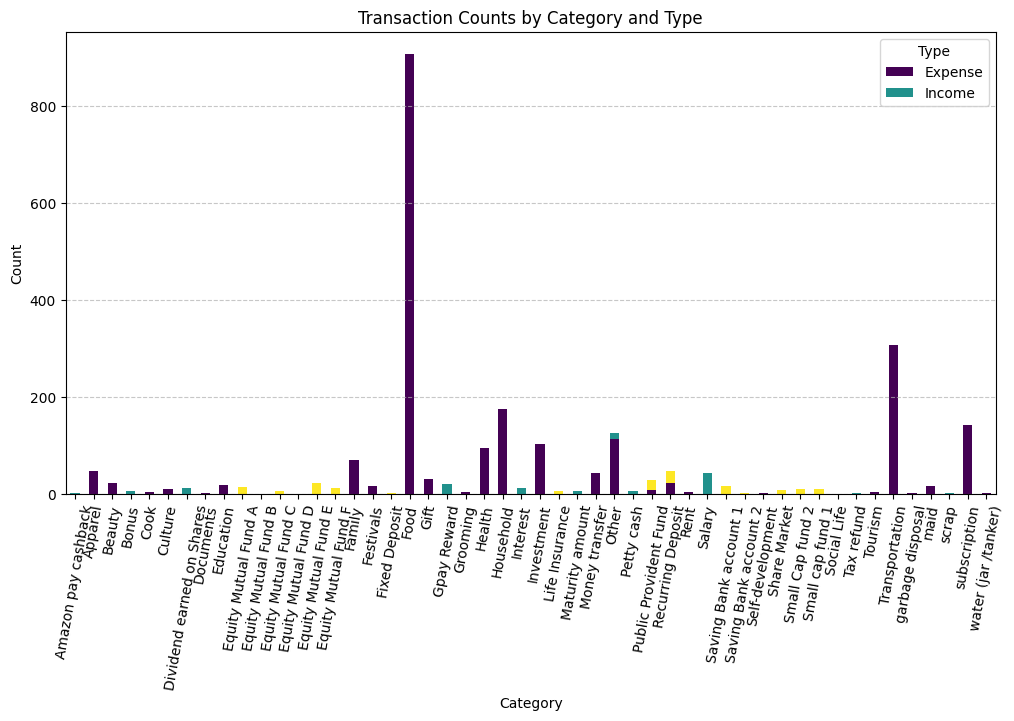

In [9]:
# Count transactions by category and Income/Expense type
category_counts = data.groupby(["Category", "Income/Expense"]).size().unstack().fillna(0)

# Plot transaction counts by category
plt.figure(figsize=(12, 6))
category_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.title("Transaction Counts by Category and Type")
plt.xlabel("Category")
plt.ylabel("Count")
plt.legend(title="Type", labels=["Expense", "Income"])
plt.xticks(rotation=80)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [10]:
# Display category-wise transaction counts
print("Category-wise Transaction Counts:\n", category_counts)

Category-wise Transaction Counts:
 Income/Expense             Expense  Income  Transfer-Out
Category                                                
Amazon pay cashback            0.0     2.0           0.0
Apparel                       47.0     0.0           0.0
Beauty                        22.0     0.0           0.0
Bonus                          0.0     6.0           0.0
Cook                           4.0     0.0           0.0
Culture                       11.0     0.0           0.0
Dividend earned on Shares      0.0    12.0           0.0
Documents                      2.0     0.0           0.0
Education                     18.0     0.0           0.0
Equity Mutual Fund A           0.0     0.0          14.0
Equity Mutual Fund B           0.0     0.0           1.0
Equity Mutual Fund C           0.0     0.0           6.0
Equity Mutual Fund D           0.0     0.0           1.0
Equity Mutual Fund E           0.0     0.0          22.0
Equity Mutual Fund F           0.0     0.0          1


                                                                    
                                                                Time Series Analysis
                                                                        

                                                                        

In [16]:
# Time Series Analysis
# Extract year-month for monthly analysis
data["Year-Month"] = data["Date"].dt.to_period("M")

<Figure size 1200x600 with 0 Axes>

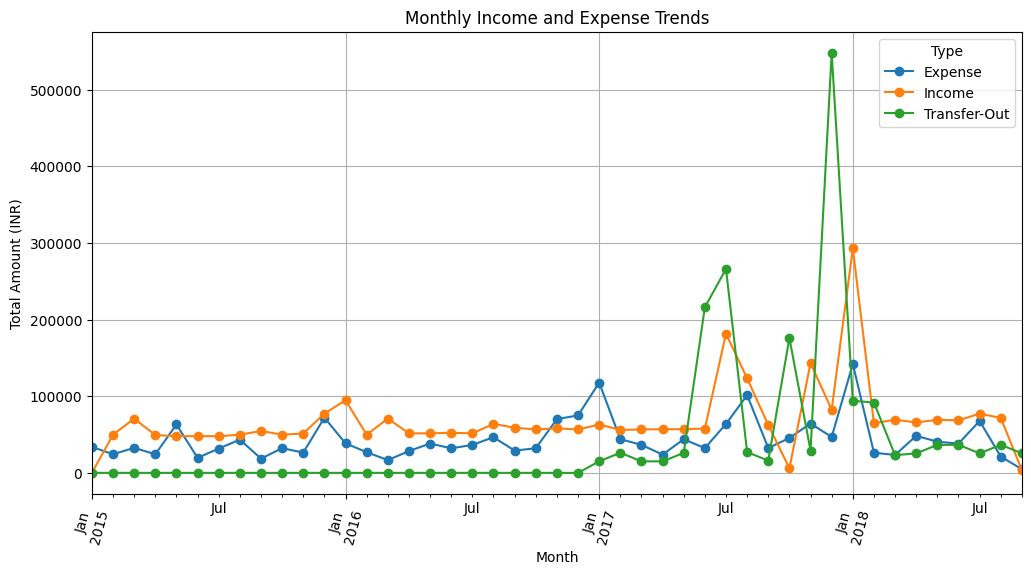

In [17]:
# Aggregate monthly income and expenses
monthly_trends = data.groupby(["Year-Month", "Income/Expense"])["Amount"].sum().unstack().fillna(0)

# Plot monthly trend
plt.figure(figsize=(12, 6))
monthly_trends.plot(kind="line", marker="o", figsize=(12, 6))
plt.title("Monthly Income and Expense Trends")
plt.xlabel("Month")
plt.ylabel("Total Amount (INR)")
plt.legend(title="Type")
plt.grid(True)
plt.xticks(rotation=75)
plt.show()

<Figure size 1200x600 with 0 Axes>

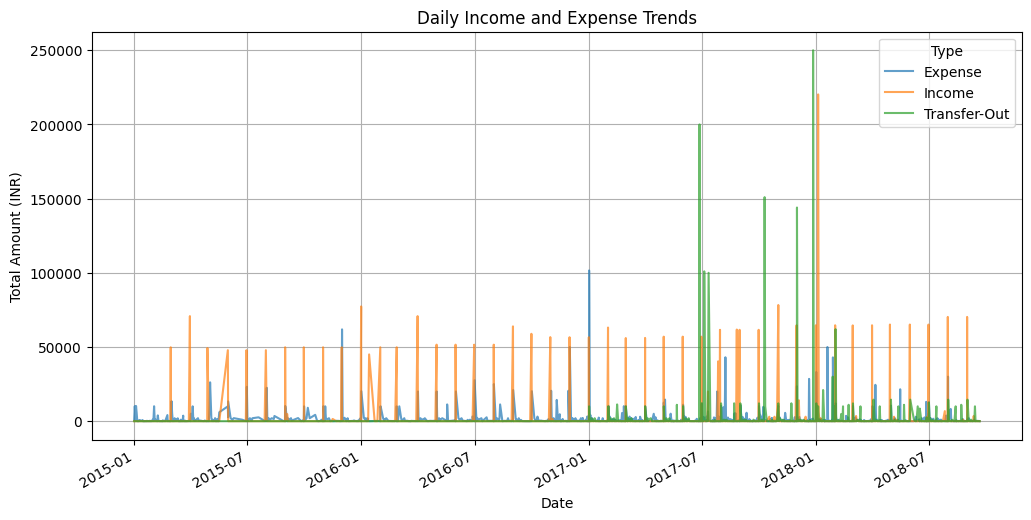

In [18]:
# Aggregate daily income and expenses
daily_trends = data.groupby(["Date", "Income/Expense"])["Amount"].sum().unstack().fillna(0)

# Plot daily trend
plt.figure(figsize=(12, 6))
daily_trends.plot(kind="line", alpha=0.7, figsize=(12, 6))
plt.title("Daily Income and Expense Trends")
plt.xlabel("Date")
plt.ylabel("Total Amount (INR)")
plt.legend(title="Type")
plt.grid(True)
plt.show()


In [19]:
# Display the first few rows of the trend data
print("Monthly Trends:\n", monthly_trends.head())
print("Daily Trends:\n", daily_trends.head())

Monthly Trends:
 Income/Expense  Expense   Income  Transfer-Out
Year-Month                                    
2015-01         33870.0      0.0           0.0
2015-02         24308.0  49806.0           0.0
2015-03         32631.4  70806.0           0.0
2015-04         24222.0  49306.0           0.0
2015-05         63118.0  47859.0           0.0
Daily Trends:
 Income/Expense  Expense  Income  Transfer-Out
Date                                         
2015-01-01        952.0     0.0           0.0
2015-01-02      10104.0     0.0           0.0
2015-01-03        622.0     0.0           0.0
2015-01-04      10230.0     0.0           0.0
2015-01-05       5551.0     0.0           0.0



                                                            
                                                            Correlation Analysis
                                            Analyze the correlation between transaction categories and amounts

                                            

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv(r"C:\Users\hp\Desktop\Unified Mentor\Daily Household Transactions\Daily Household Transactions.csv")

In [44]:
data.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency,Year-Month
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR,2018-09
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR,2018-09
2,2018-09-19 00:00:00,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR,2018-09
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR,2018-09
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR,2018-09


In [51]:
data.dtypes

Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
Year-Month             period[M]
dtype: object

In [24]:
data['Category_Encoded'] = data['Category'].astype('category').cat.codes

In [25]:
correlation = data[['Category_Encoded', 'Amount']].corr()
print(correlation)

                  Category_Encoded    Amount
Category_Encoded          1.000000  0.087907
Amount                    0.087907  1.000000


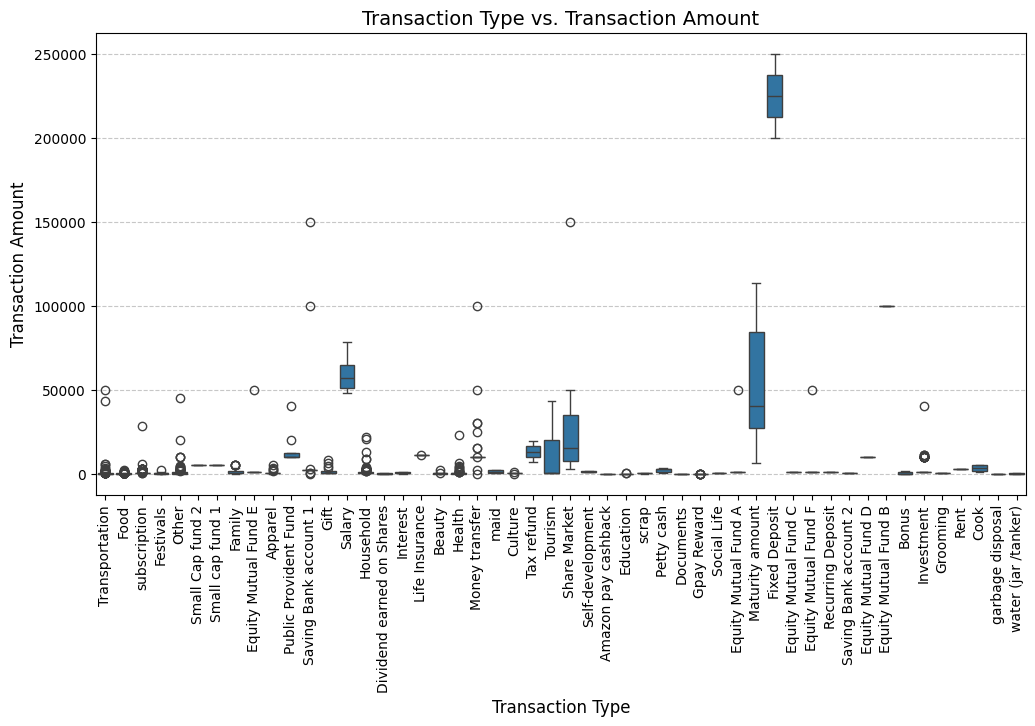

In [26]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Amount', data=data)

plt.title("Transaction Type vs. Transaction Amount", fontsize=14)
plt.xlabel("Transaction Type", fontsize=12)
plt.ylabel("Transaction Amount", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=90)
plt.show()

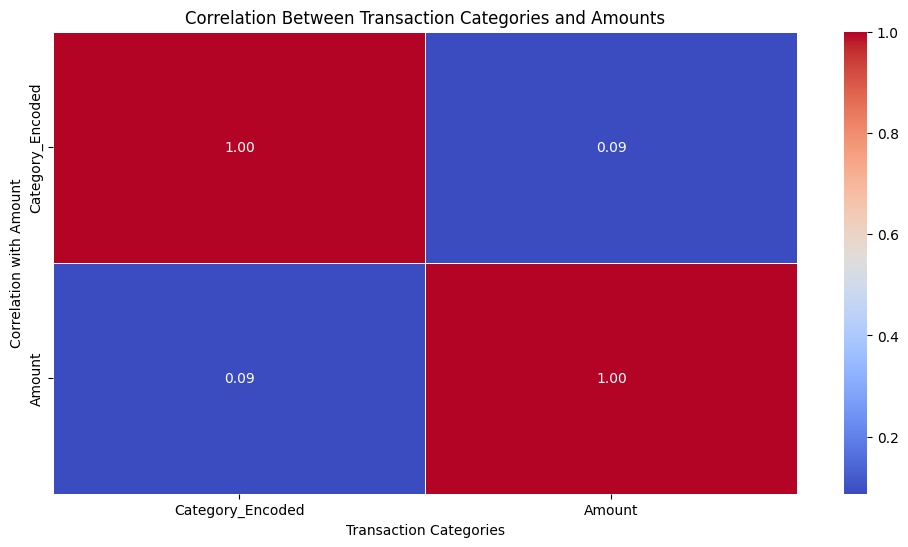

In [27]:
# Plot correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("Correlation Between Transaction Categories and Amounts")
plt.xlabel("Transaction Categories")
plt.ylabel("Correlation with Amount")
plt.show()

In [28]:
data.to_csv("Daily_Household_Transactions_Encoded.csv", index=False)



                                                                    --END--

                                                                    